In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_experiment_timespent.csv")

In [65]:
# Checking proportion of confirmed for each variation
proportion_table = pd.crosstab(df['Variation'], df['confirmed'], normalize='index') * 100
proportion_table

confirmed,False,True
Variation,,
Control,52.302857,47.697143
Test,42.318794,57.681206


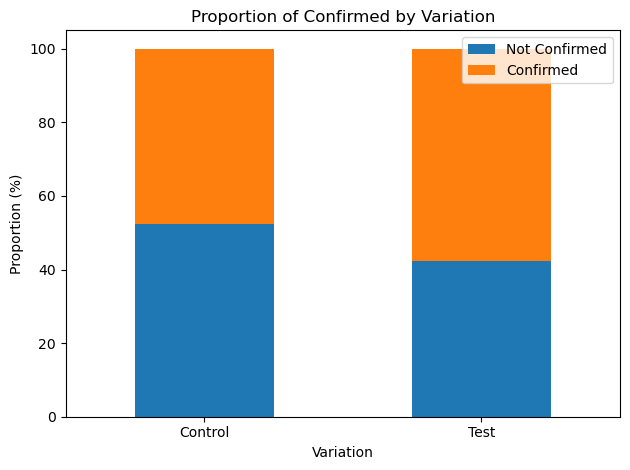

In [66]:
# Plotting the frequency table
import matplotlib.pyplot as plt
proportion_table.plot(kind='bar', stacked=True)
plt.title('Proportion of Confirmed by Variation')
plt.xlabel('Variation')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=0)
plt.legend(labels=['Not Confirmed', 'Confirmed'])
plt.tight_layout()
plt.show()

In [43]:
df_group_by_variation = df.groupby(['last_step','Variation'])['time_spent'].mean()
df_group_by_variation

last_step  Variation
1          Control      160.769007
           Test         255.202900
2          Control      192.532932
           Test         210.282526
3          Control      192.490048
           Test         251.196684
4          Control      318.221470
           Test         389.346089
5          Control      385.245188
           Test         359.041248
Name: time_spent, dtype: float64

In [44]:
df_group_by_variation_count = df.groupby(['last_step','Variation'])['time_spent'].mean()
df_group_by_variation_count

last_step  Variation
1          Control      160.769007
           Test         255.202900
2          Control      192.532932
           Test         210.282526
3          Control      192.490048
           Test         251.196684
4          Control      318.221470
           Test         389.346089
5          Control      385.245188
           Test         359.041248
Name: time_spent, dtype: float64

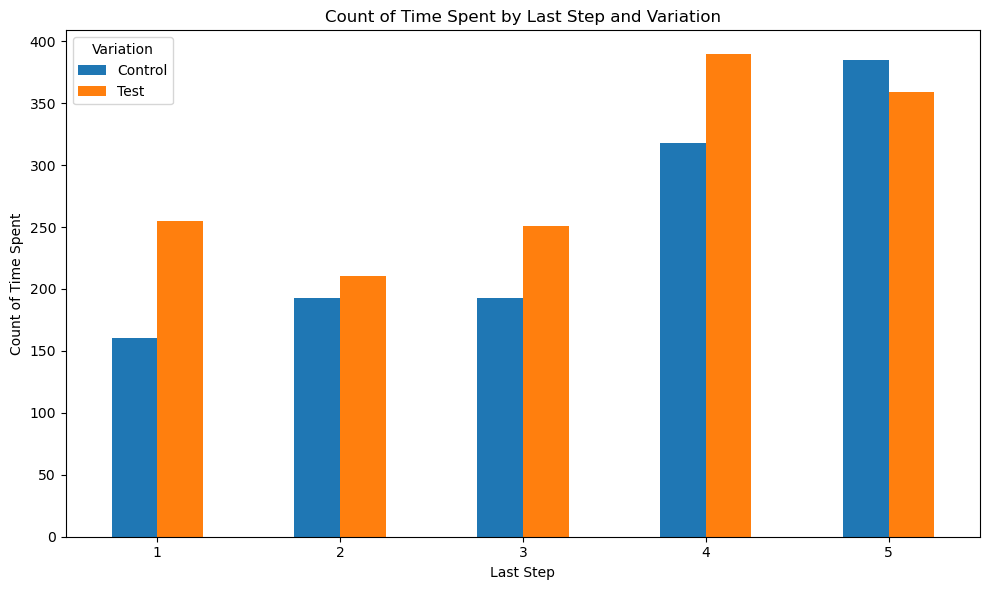

In [45]:
# visualize df_group_by_variation_count
import matplotlib.pyplot as plt
df_group_by_variation_count.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Count of Time Spent by Last Step and Variation')
plt.xlabel('Last Step')
plt.ylabel('Count of Time Spent')
plt.xticks(rotation=360)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()


In [46]:
df2 = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_web_experiment_steps.csv")    

In [47]:
df2

,client_id,visitor_id,visit_id,process_step,date_time,Variation,repeated_step,step_repeated
0,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:27:07,Test,1,4
1,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:26:51,Test,1,3
2,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:19:22,Test,1,4
3,9988021,580560515_7732621733,781255054_21935453173_531117,3,2017-04-17 15:19:13,Test,1,3
4,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:18:04,Test,1,4
...,...,...,...,...,...,...,...,...
317230,1574008,117364417_77840596075,528720790_71583064618_169151,1,2017-05-06 23:43:27,Test,0,0
317231,2908510,814969699_90652851448,562606085_36368381773_92090,1,2017-05-10 22:57:17,Control,1,1
317232,2908510,814969699_90652851448,562606085_36368381773_92090,3,2017-05-10 22:56:31,Control,0,0
317233,2908510,814969699_90652851448,562606085_36368381773_92090,2,2017-05-10 22:56:23,Control,0,0


In [48]:
import seaborn as sns
import matplotlib.pyplot as plt


errors = df2.groupby(['step_repeated', 'Variation'])['repeated_step'].count()
errors

step_repeated  Variation
0              Control      75455
               Test         85414
1              Control      28863
               Test         39597
2              Control      13782
               Test         21315
3              Control      11148
               Test         12859
4              Control       8338
               Test          7633
5              Control       2950
               Test          9881
Name: repeated_step, dtype: int64

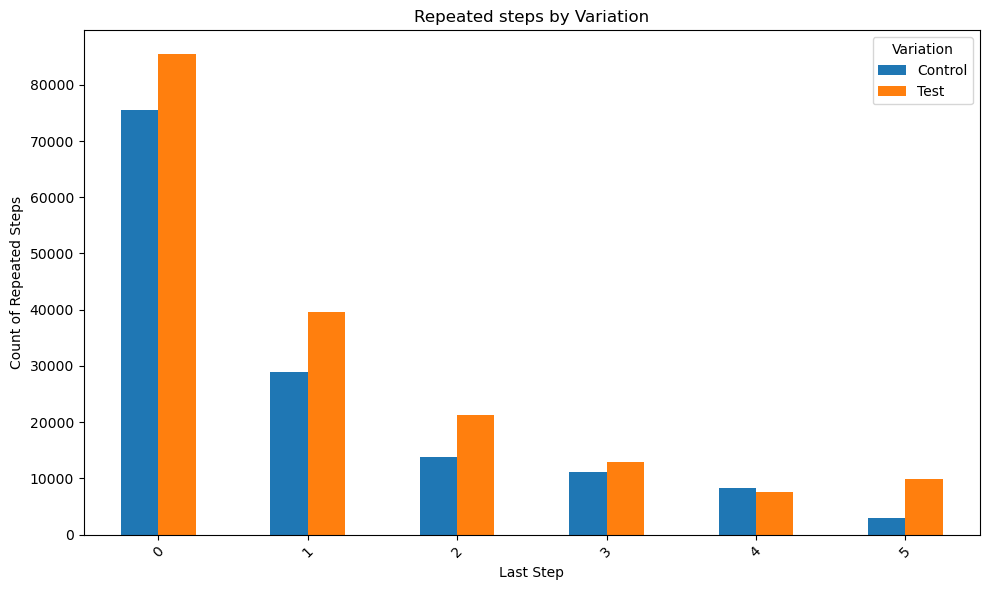

In [49]:
errors.unstack().plot(kind='bar', figsize=(10,6))
plt.title('Repeated steps by Variation')
plt.xlabel('Last Step')
plt.ylabel('Count of Repeated Steps')
plt.xticks(rotation=45)
plt.legend(title='Variation')
plt.tight_layout()
plt.show()

In [50]:
df1 = pd.read_csv("/Users/anasghonaim/Library/CloudStorage/OneDrive-Personal/Ironhack/Week 5/week5_6_project/data/cleaned/df_final_demo.csv")

In [51]:
df3 = pd.merge(df, df1, on="client_id", how="left")
df3

,client_id,visitor_id,visit_id,process_step,date_time,Variation,last_step,time_spent,confirmed,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,9988021,580560515_7732621733,781255054_21935453173_531117,4,2017-04-17 15:27:07,Test,4,645,False,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0
1,8320017,39393514_33118319366,960651974_70596002104_312201,5,2017-04-05 13:10:05,Test,5,119,True,22.0,274.0,34.5,M,2.0,36001.90,5.0,8.0
2,4033851,762728880_76361333336,949661017_22392791362_127391,5,2017-04-05 12:29:03,Control,5,1503,True,12.0,149.0,63.5,M,2.0,142642.26,5.0,8.0
3,1982004,618934751_10082078917,132494692_73738638511_70823,5,2017-04-17 12:02:42,Test,5,180,True,6.0,80.0,44.5,U,2.0,30231.76,1.0,4.0
4,9294070,489274391_63794562906,116640698_27328181095_188045,1,2017-04-17 11:16:28,Control,1,15,False,5.0,70.0,29.0,U,2.0,34254.54,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69200,6426623,27047012_3402532492,685634090_42070675506_389171,5,2017-05-19 05:40:14,Control,5,181,True,6.0,75.0,47.0,U,2.0,43854.27,5.0,8.0
69201,433098,5505424_50616523266,773565250_67577573147_389841,5,2017-05-13 15:33:04,Control,5,137,True,6.0,73.0,25.0,U,2.0,34419.62,2.0,5.0
69202,7049106,710348688_12741653529,412278907_8949064401_171038,1,2017-05-20 23:07:09,Test,1,0,False,17.0,206.0,64.0,F,3.0,237685.57,4.0,7.0
69203,1574008,117364417_77840596075,528720790_71583064618_169151,5,2017-05-06 23:51:05,Test,5,458,True,10.0,121.0,55.0,U,2.0,153238.83,3.0,6.0


In [52]:
potential_categorical_from_numerical = df3.select_dtypes("number").loc[:, df3.select_dtypes("number").nunique() < 20]
df_categorical = pd.concat([df3.select_dtypes("object"), potential_categorical_from_numerical], axis=1)
df_numerical = df3.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [53]:
df_numerical.corr()

,client_id,time_spent,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,bal
client_id,1.000000,-0.006018,0.003225,0.002944,-0.004480,0.007431
time_spent,-0.006018,1.000000,0.003490,0.003844,0.070481,-0.001156
clnt_tenure_yr,0.003225,0.003490,1.000000,0.998995,0.320644,0.193579
clnt_tenure_mnth,0.002944,0.003844,0.998995,1.000000,0.320833,0.192744
clnt_age,-0.004480,0.070481,0.320644,0.320833,1.000000,0.187595
bal,0.007431,-0.001156,0.193579,0.192744,0.187595,1.000000


In [54]:
df3.isna().sum()

client_id            0
visitor_id           0
visit_id             0
process_step         0
date_time            0
Variation            0
last_step            0
time_spent           0
confirmed            0
clnt_tenure_yr      22
clnt_tenure_mnth    22
clnt_age            22
gendr               22
num_accts           22
bal                 22
calls_6_mnth        22
logons_6_mnth       22
dtype: int64

In [ ]:
# Chi-square test for independence between Variation and confirmed status rejects the null hypothesis.

# H0: There is no difference in the proportion of confirmed users between Variation Test and Variation Control.
# H1: There is a significant difference in the proportion of confirmed users between Variation Test and Variation Control.
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df3['Variation'], df3['confirmed'])
_, p_value, _, _ = chi2_contingency(contingency_table)
p_value

np.float64(9.521275564479852e-152)

In [70]:

#H0: There is no association between confirmation status and age group.
#H1: There is an association between confirmation status and age group.
contingency_table_age = pd.crosstab(df3['clnt_age'], df3['confirmed'])
_, p_value_age, _, _ = chi2_contingency(contingency_table_age)
p_value_age

np.float64(0.0)

In [73]:
df3.groupby('age_group')['confirmed'].count()

/var/folders/wc/048rx86x7bqbzmjn7nr46j_80000gn/T/ipykernel_6724/2275001203.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df3.groupby('age_group')['confirmed'].count()


age_group
18-24     4097
25-34    13225
35-44    10923
45-54    13372
55-64    15678
65+      11805
Name: confirmed, dtype: int64